# Tropical Cyclone Beta Effect

## Governing equation

- Assume barotropic and non-divergent
- Assume $w = 0$

$\frac{D\zeta}{Dt} = - \beta v$

- where $\beta = \frac{\partial f}{\partial y} = \frac{2\Omega cos(\phi)}{r}$

## Let's create a purely rotational wind field. 

- The following formula can be used to approximate rotational wind speed from center of a hurricane. Holland et al. (2009)

$\frac{r v_m}{r_m} e^{\big[1-\big(\frac{r}{r_m}\big)^c\big]/d}$

In [632]:
import numpy as np
import matplotlib.pyplot as plt

def wind_speed(x, y): 
    vm  = 60
    rm  = 31
    c   = 2.1
    d   = 2.3
    
    r = np.sqrt(x**2+y**2)
    
    return (r*vm/rm)*np.exp((1-(r/rm)**c)/d)

In [633]:
def get_angle(x, y): 
    ## given an x and y point, find the angle that it makes with the x axis. 
    # ang = tan-1(y/x) ? 
    return np.arctan2(y, x);

In [634]:
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

X, Y = np.meshgrid(x,y)

In [635]:
lat = np.linspace(20, 23, 100)
lon = np.linspace(-70, -67, 100)

LAT, LON = np.meshgrid(lat, lon)

In [636]:
omega = 2*np.pi/86400
f     = 2*np.pi*omega*np.sin(2*np.pi/LAT)
s     = wind_speed(X,Y)

## Visualize the wind speed field

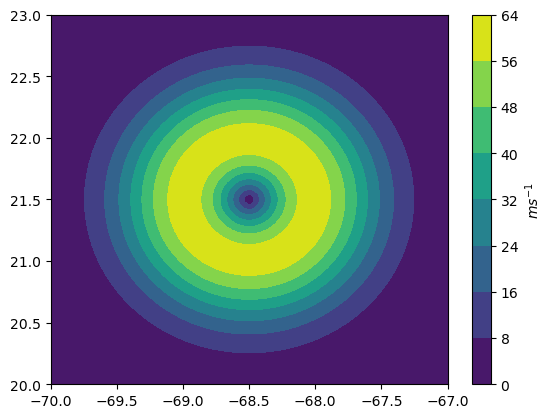

In [637]:
c = plt.contourf(LON, LAT, s)
colorbar = plt.colorbar(c).set_label(r'$ms^{-1}$')

In [638]:
ang = get_angle(X,Y)
u   = -s*np.cos(ang)
v   = s*np.sin(ang)

In [639]:
## Visualize wind vectors

Text(0.5, 1.0, 'wind field ($\\frac{m}{s}$)')

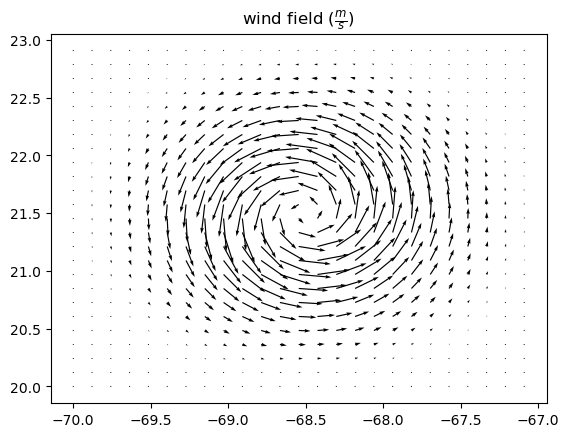

In [640]:
step    = 4
skip = (slice(None, None, step), slice(None, None, step))
plt.quiver(LON[skip],LAT[skip],u[skip],v[skip], scale = 900)
plt.title(r'wind field ($\frac{m}{s}$)')


### $\beta = \frac{\partial f}{\partial y} = \frac{2\Omega cos(\phi)}{r}$

In [641]:
beta = 2*omega*np.cos(2*np.pi/21.5)/6371000

### Finding the vorticity tendency field due to advection of planetary vorticity ($s^{-2}$)

In [642]:
dzeta = -beta*v

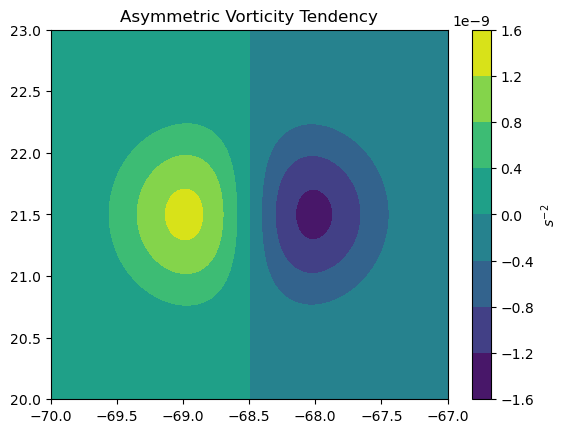

In [643]:
c = plt.contourf(LON, LAT, dzeta)
colorbar = plt.colorbar(c).set_label(r'$s^{-2}$');
plt.title('Asymmetric Vorticity Tendency');

### Assume this steady state continues for an hour

- Let's approximate the induced wind field due to the Beta effect.
- We know that $\zeta = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$ 

 The resulting vorticity field is 

Text(0.5, 1.0, 'Asymmetric Vorticity')

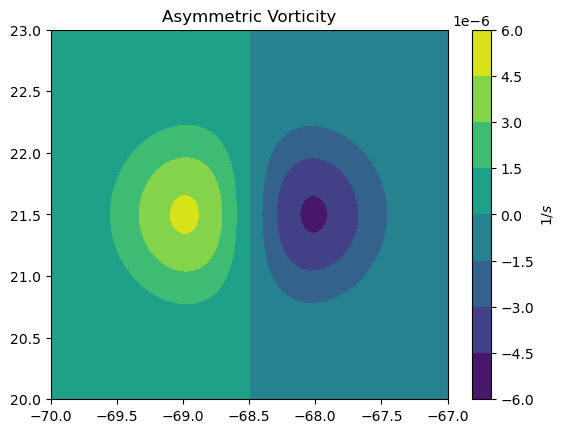

In [644]:
asym_vort = dzeta*3600
c = plt.contourf(LON, LAT, asym_vort)
colorbar = plt.colorbar(c).set_label(r'$1/s$')
plt.title('Asymmetric Vorticity')

- Let's use a finite difference method to find the associated streamfunction, $\Psi$

In [677]:
# Iterative solution using finite difference method
nx  = 100
ny  = 100
psi = np.zeros(u.shape)
iterations = 1000

for k in range(iterations):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            psi[j, i] = -0.25 * (psi[j+1, i] + psi[j-1, i] + psi[j, i+1] + psi[j, i-1] - 1 * 1 * asym_vort[j, i])


- Additionally , 

#### $u = \frac{\partial \Psi}{\partial y}$
#### $v = - \frac{\partial \Psi}{\partial x}$ 

In [680]:
u_ind =  np.gradient(psi, axis = 1)
v_ind =  - np.gradient(psi, axis = 0)

Text(0.5, 1.0, 'Induced wind field and vorticty,\noverlaid on contours of hurricane wind speed')

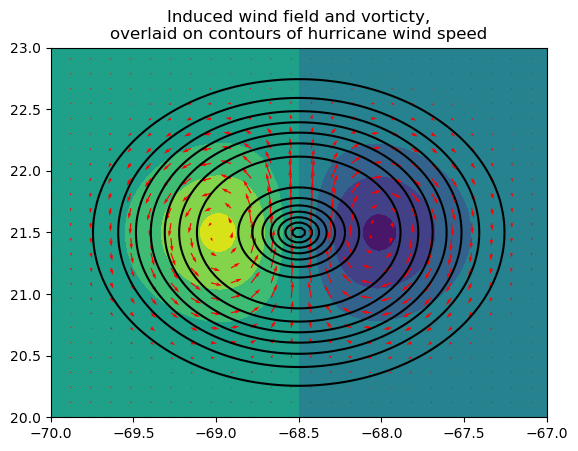

In [719]:
step    = 4
skip = (slice(None, None, step), slice(None, None, step))
c = plt.contour(LON, LAT, s, colors = 'k')

c = plt.contourf(LON, LAT, asym_vort, labe)
plt.quiver(LON[skip],LAT[skip],u_ind[skip],v_ind[skip], color = 'red', scale = 1e-6)
plt.title('Induced wind field and vorticty,\noverlaid on contours of hurricane wind speed')

- Notice that the storm will tend to propogate to the west over time, towards higher values of vorticity. Additionally, note that the center of the storm is advected to the north by the induced wind field. In the absence of steering flow, a storm will naturally move to the northwest due to the beta effect.